In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import os
# import preproc_func as pf

In [2]:
# Настройка рабочего стола и вывода инфы в пандас
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_columns = 15
pd.options.display.precision = 7
pd.options.display.max_colwidth = 50

In [3]:
# ois_init = pd.read_excel('NEFT_MESSO_01.01.2018+.xlsx')
# slq_query_1st['Скважина'] = slq_query_1st['Скважина'].astype('string')
# set1 = np.array(slq_query_1st['Скважина'].unique())
# set2 = ois_init_new['Скважина'].unique()
# set_diff1 = np.setdiff1d(set1, set2)
# set_diff2 = np.setdiff1d(set2, set1)
# temp3 = np.concatenate((set_diff1, set_diff2))
# temp3

## Загрузка данных от 13 апреля 2023г и проверка типов данных

In [4]:
# ois_init_new = pd.read_csv('messo_neft_202304131049.csv')
# ois_init_new['Дата'] = pd.to_datetime(ois_init_new['Дата'])
# ois_init_new['Скважина'] = ois_init_new['Скважина'].astype('string')
# ois_init_new.info()

## Загрузка данных от 4 мая 2023г и проверка типов данных

In [5]:
ois_init_new = pd.read_csv('messo_neft_202305042132.csv', encoding='cp1251', sep=';')
ois_init_new['Дата'] = pd.to_datetime(ois_init_new['Дата'])
ois_init_new['Скважина'] = ois_init_new['Скважина'].astype('string')
ois_init_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174384 entries, 0 to 174383
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Well_ID                   174384 non-null  int64         
 1   Месторождение             174384 non-null  object        
 2   Дата                      174384 non-null  datetime64[ns]
 3   Скважина                  174384 non-null  string        
 4   Куст                      174384 non-null  object        
 5   ДО                        174384 non-null  object        
 6   Кластер                   174384 non-null  object        
 7   Участок                   174384 non-null  object        
 8   Тип ствола                174384 non-null  object        
 9   Характер работы           174384 non-null  object        
 10  Состояние                 174384 non-null  object        
 11  Количество пластов        174384 non-null  int64         
 12  Пл

## Проверка с какого года начинается большинство значений

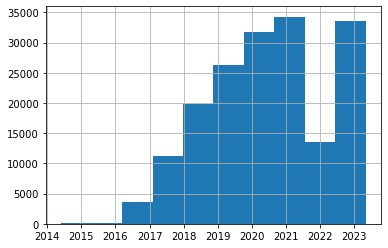

In [6]:
plt.hist(ois_init_new['Дата'])
plt.grid();

## Функция для просмотра OIS

In [7]:
def dataframe_ois_init(wellName):
    return ois_init_new[ois_init_new['Скважина'] == wellName]

## Загрузка информации по ОПЗ из таблицы ГТМ и проверка типов 

In [8]:
%%time
gtm_init = pd.read_excel('Свод данных (оценка эфф ГТМ).xlsx', sheet_name = 'ОПЗ!')
gtm_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Скв.            61 non-null     object        
 1   Куст            61 non-null     float64       
 2   Пласт           59 non-null     object        
 3   Дата ГТМ        61 non-null     datetime64[ns]
 4   Запуск как ГТМ  35 non-null     object        
 5   Набор работ     61 non-null     object        
 6   Технология      15 non-null     object        
 7   Состав химии    61 non-null     object        
 8   Остановочные    62 non-null     object        
 9   Unnamed: 9      62 non-null     object        
 10  Unnamed: 10     62 non-null     object        
 11  Unnamed: 11     62 non-null     object        
 12  Unnamed: 12     61 non-null     object        
 13  Запускные       58 non-null     object        
 14  Unnamed: 14     58 non-null     object        
 15  Unnamed:

In [9]:
#Выгрузка списка скважин с ОПЗ для запроса sql 
well2sql_opz = gtm_init['Скв.'].astype('string')
well2sql_opz = well2sql_opz.unique()

## Обрезка датасета только до даты, пласта, скважины, инфы по ОПЗ

In [10]:
gtm_dates = gtm_init[['Скв.', 'Пласт', 'Дата ГТМ', 'Набор работ', 'Состав химии']][2:]
gtm_dates['Дата ГТМ'] = pd.to_datetime(gtm_dates['Дата ГТМ'], unit='D')
gtm_dates['Скв.'] = gtm_dates['Скв.'].astype('string')
gtm_dates.head()

,Скв.,Пласт,Дата ГТМ,Набор работ,Состав химии
2,14,ПК1-3,2014-08-20,ОПЗ + ГМ,Каустическая сода
3,181,ПК1-3,2015-08-07,ГМ,нет
4,444,ПК1-3,2015-12-20,ОПЗ,"10% HCL y=1,05 г/см3"
5,1507,ПК1-3,2017-01-24,ОПЗ + ГМ,Каустическая сода
6,472,ПК1-3,2017-02-11,ГМ Jet Blaster,нет


## Загрузка информации по ПВР из таблицы ГТМ и проверка типов данных

In [11]:
%%time
gtm_pvr_init = pd.read_excel('Свод данных (оценка эфф ГТМ).xlsx', sheet_name = 'ПВР!')
gtm_pvr_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Скв.             74 non-null     object        
 1   Куст             73 non-null     object        
 2   Пласт            74 non-null     object        
 3   Дата ГТМ         74 non-null     datetime64[ns]
 4   Запуск как ГТМ   56 non-null     object        
 5   Цель             74 non-null     object        
 6   Интервалы по MD  74 non-null     object        
 7   Остановочные     69 non-null     object        
 8   Unnamed: 8       69 non-null     object        
 9   Unnamed: 9       69 non-null     object        
 10  Unnamed: 10      69 non-null     object        
 11  Unnamed: 11      69 non-null     object        
 12  Запускные        69 non-null     object        
 13  Unnamed: 13      69 non-null     object        
 14  Unnamed: 14      69 non-null     object     

## Формирование списка скважин для выгрузки из КХД БРД

In [12]:
# Выгрузка списка скважин с ПВР для запроса sql и конкатенация со списком скважин ОПЗ
# Для скважины 2в есть следующий ID, возомжно надо будет просто выгрузить отдельным датасетом и
# и сконкатенировать (110000204, 2В, 2, Восточно-Мессояхское)
well2sql_pvr = gtm_pvr_init['Скв.'].astype('string')
well2sql_pvr = well2sql_pvr.unique()
well2sql_total = np.concatenate((well2sql_pvr,well2sql_opz), axis=0)
df_well2sql_total = pd.DataFrame(well2sql_total, columns=['wells'])
df_well2sql_total[~df_well2sql_total.wells.isna()].wells.unique()

array(['15', '1299', '477', '446', '1503', '1600', '470', '508', '5290',
       '476', '307', '1307', '352', '504', '353', '662', '382', '631',
       '1439', '447', '165', '1471', '3062', '301', '1134', '420', '500',
       '3045', '682', '1438', '325', '298', '592', '3035', '1382', '3048',
       '1279', '1691', '746', '1595', '3056', '1596', '13', '438', '305',
       '1507', '600', '538', '501', '633', '621', '766', '289', '618',
       '1102', '540', '1509', '629', '1157', '157', '709', '4011', '1661',
       '186', '3021', '1410', '619', '386', '46ПО', '431', '1690', '588',
       '205', '14', '181', '444', '472', '34', '162', '1132', '1381',
       '247', '249', '166', '1480', '507', '360', '510', '541', '12',
       '5026', '250', '655', '8031', '8070', '1739', '6807', '206',
       '8052', '6214', '2в', '243', '620', '321', '776', '6317', '237',
       '4278', '4227', '194', '74', '138', '192', '6830', '4225', '3057',
       '4010', '356', '4110', '384'], dtype=object)

In [13]:
print(len(df_well2sql_total[~df_well2sql_total.wells.isna()].wells.unique()))

120


## Обрезка датасета только до даты, пласта, скважины, инфы по ПВР

In [14]:
gtm_pvr_dates = gtm_pvr_init[['Скв.', 'Пласт', 'Дата ГТМ', 'Цель']][2:]
gtm_pvr_dates['Скв.'] = gtm_pvr_dates['Скв.'].astype('string')
gtm_pvr_dates.head()

,Скв.,Пласт,Дата ГТМ,Цель
2,15,ПК1-3,2017-01-23,ДПВР
3,1299,ПК1-3,2017-01-31,ДПВР
4,477,ПК1-3,2017-05-09,ДПВР
5,446,ПК1-3,2017-05-17,ДПВР
6,1503,ПК1-3,2017-05-20,ДПВР


## Загрузка информации по Рпл из эксель-таблицы Мессояхи 

In [161]:
p_plast_init = pd.read_excel('История Рпл _Вост-Мессояхское _2023_03_01.xls')
p_plast_process = p_plast_init.iloc[:, 0:80]
p_plast_xls = pd.melt(p_plast_process, id_vars='NSKV')
p_plast_xls.rename(columns={'NSKV':'well',
                                'variable':'date',
                                'value':'p_plast'}, inplace=True)
p_plast_xls.well = p_plast_xls.well.astype('string')
p_plast_xls.head()

,well,date,p_plast
0,102,2016-09-01,0.0
1,104,2016-09-01,0.0
2,107,2016-09-01,0.0
3,108,2016-09-01,0.0
4,11,2016-09-01,79.0


## Здесь я пытаюсь прикрутить Рпл из мессояхской таблицы к основному датасету

In [162]:
ois_ppl_mess = ois_init_new[['Дата', 'Скважина','Пластовое P кровля [атм]']]
ois_ppl_mess.head(3)

,Дата,Скважина,Пластовое P кровля [атм]
0,2014-06-02,12,0.0
1,2014-06-03,12,0.0
2,2014-06-04,12,0.0


In [164]:
p_plast_xls_join = p_plast_xls.copy()
p_plast_xls_join.rename(columns={'well':'Скважина',
                                 'date':'Дата',
                                 'p_plast':'Пластовое P xls'}, inplace=True)
p_plast_xls_join.head(3)

,Скважина,Дата,Пластовое P xls
0,102,2016-09-01,0.0
1,104,2016-09-01,0.0
2,107,2016-09-01,0.0


In [165]:
ois_ppl_mess_mli = ois_ppl_mess.set_index(pd.MultiIndex.from_frame(ois_ppl_mess[['Дата', 'Скважина']]))
p_plast_xls_join_mli = p_plast_xls_join.set_index(pd.MultiIndex.from_frame(p_plast_xls_join[['Дата', 'Скважина']]))

In [166]:
ois_ppl_mess_mli = ois_ppl_mess_mli.drop(['Дата', 'Скважина'], axis=1)

In [167]:
p_plast_xls_join_mli = p_plast_xls_join_mli.drop(['Скважина', 'Дата'], axis=1)

In [168]:
well_ppl_join = ois_ppl_mess_mli.join(p_plast_xls_join_mli, on=['Дата','Скважина'])

In [169]:
well_ppl_join[~well_ppl_join['Пластовое P xls'].isna()].head()

,,Пластовое P кровля [атм],Пластовое P xls
Дата,Скважина,,
2016-09-01,12,78.0,79.0
2016-10-01,12,78.0,79.0
2016-11-01,12,78.0,77.3
2016-12-01,12,78.0,75.6
2017-01-01,12,74.0,74.0


In [170]:
well_ppl_join['Пластовое P xls'] = well_ppl_join['Пластовое P xls'].fillna(method='bfill')

In [171]:
well_ppl_join.reset_index(inplace=True)

In [172]:
well_ppl_join

,Дата,Скважина,Пластовое P кровля [атм],Пластовое P xls
0,2014-06-02,12,0.0,79.0
1,2014-06-03,12,0.0,79.0
2,2014-06-04,12,0.0,79.0
3,2014-06-11,12,0.0,79.0
4,2014-06-12,12,0.0,79.0
...,...,...,...,...
174379,2023-04-27,8070,69.0,NaN
174380,2023-04-28,8070,69.0,NaN
174381,2023-04-29,8070,69.0,NaN
174382,2023-04-30,8070,69.0,NaN


In [136]:
# f1, ax1 = plt.subplots(figsize=(15,5))
# ax1.step(well_ppl_join.index, well_ppl_join['p_plast'], c='black')
# ax1.scatter(well_ppl_join.index, well_ppl_join['Пластовое P кровля [атм]'], c='green', alpha=0.5)
# ax1.grid()

## Функция для отрисовки графических диаграмм по всем скважинам Мессояхи в случае ОПЗ

In [173]:
def display_well_eda_opz(wellName):
    well_test = ois_init_new[ois_init_new['Скважина'] == wellName]
    
    gtm_time = gtm_dates[gtm_dates['Скв.'] == wellName].iloc[0]['Дата ГТМ']
    gtm_time_converted = gtm_time.strftime('%d-%m-%Y')

    p_plast = p_plast_xls[p_plast_xls.well == wellName]
    zone = ois_init_new[ois_init_new['Скважина'] == wellName].iloc[0]['Пласт']
    work_type =  gtm_dates[gtm_dates['Скв.'] == wellName].iloc[0]['Набор работ']
    YLIM_QLIQ = round(np.nanmean(well_test['Qж  (ТМ) [м3/сут]']),0)
    
    f,ax = plt.subplots(figsize=(20,5))
    ax.set_title('Скв№ ' + f'{wellName}' + f' {zone}' + f' // дата ГТМ: {gtm_time_converted};' + f' Набор работ: {work_type}', fontsize=20)
    
    
    ax.scatter(well_test['Дата'], well_test['Qн (ТМ) [тн/сут]'], color = 'brown', alpha=0.5, s=50, label ='Qн (ТМ) [тн/сут]' )
    ax.scatter(well_test['Дата'], well_test['Qж  (ТМ) [м3/сут]'], color = 'blue', alpha=0.5, s=50, label ='Qж (ТМ) [м3/сут]' )
    
    ax.scatter(well_test['Дата'], well_test['Qн расчёт [тн/сут]'], color = 'black', alpha=0.5, s=50, label ='Qн расчёт [тн/сут]' )
    ax.scatter(well_test['Дата'], well_test['Qж ручной [м3/сут]'], color = 'gray', alpha=0.5, s=50, label ='Qж ручной [м3/сут]' )
        
    ax.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
    ax.set_ylim(0,YLIM_QLIQ*4)
    ax.set_ylabel('Qж  (ТМ) [м3/сут]', color ='blue')
    ax.vlines(x=gtm_time, ymin=0, ymax=YLIM_QLIQ*4, colors='red')
    plt.grid()
    
    ax2 = ax.twinx()
    ax2.scatter(well_test['Дата'], well_test['Обв-ть V (ХАЛ) [%]'], color = 'lightblue', alpha=0.66, s=75, label ='Обв-ть V (ХАЛ) [%]', marker = 's')
    ax2.tick_params(axis='y', labelcolor='lightblue', pad=50, labelsize=14, direction = 'in')
    ax2.set_ylim(0,100)
    ax2.set_ylabel('Обв-ть V (ХАЛ) [%]', color ='lightblue' )
    ax2.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.7, 1))
    
    ax3 = ax.twinx()
    ax3.tick_params(axis='y', labelcolor='green', labelsize=14)
    ax3.scatter(well_test['Дата'], well_test['Пластовое P кровля [атм]'], color = 'green', alpha=0.75, marker = 'd', label ='Pпл кровля OIS [атм]' )
    ax3.scatter(well_test['Дата'], well_test['Pзаб от Pпр'], color = '#17bf74', alpha=0.75, marker = 'd', label ='Pзаб от Pпр OIS' )
    ax3.step(p_plast.date, p_plast.p_plast, color='black', label ='Pпл от Мессояха' )
    ax3.set_ylim(0,100)
    ax3.set_ylabel('Давления пластовы/забойные', color ='green' )
    ax3.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.84, 1))
    plt.tight_layout()
# Надо отключать строку печати диаграммы
#     plt.savefig('eda/' + 'test_eda_opz_' + str(wellName) + '.jpg', dpi=300) # Для печати графиков в папку

## Просмотр любой скважины для тестирование отображения ОПЗ

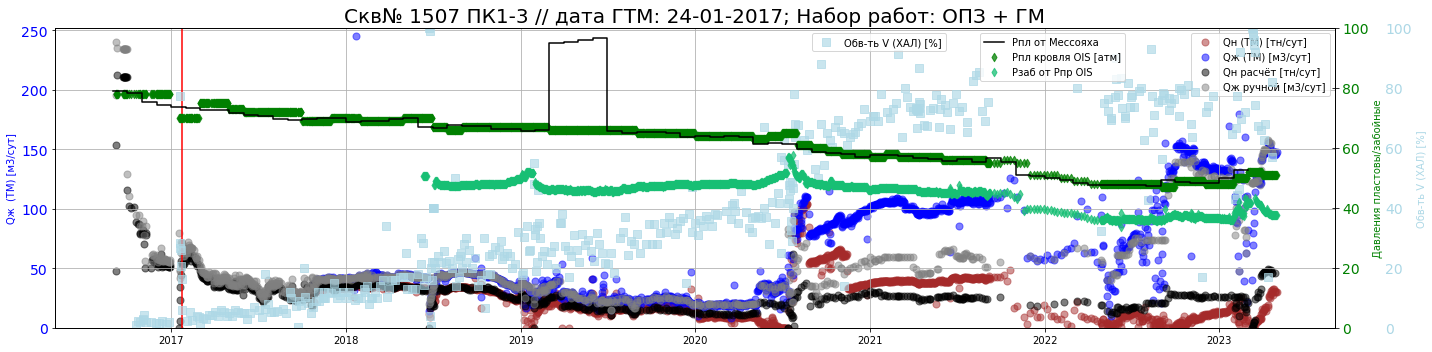

In [174]:
display_well_eda_opz('1507')

 ## Сопоставляю Рпл из эксель от Мессояхи и Рпл из КХД БРД

In [59]:
p_plast_sql = pd.read_csv('messo_pplast_202304131624.csv')
p_plast_sql.well = p_plast_sql.well.astype('string')
p_plast_sql.well = p_plast_sql.well.str.strip()
p_plast_sql.date = pd.to_datetime(p_plast_sql.date)

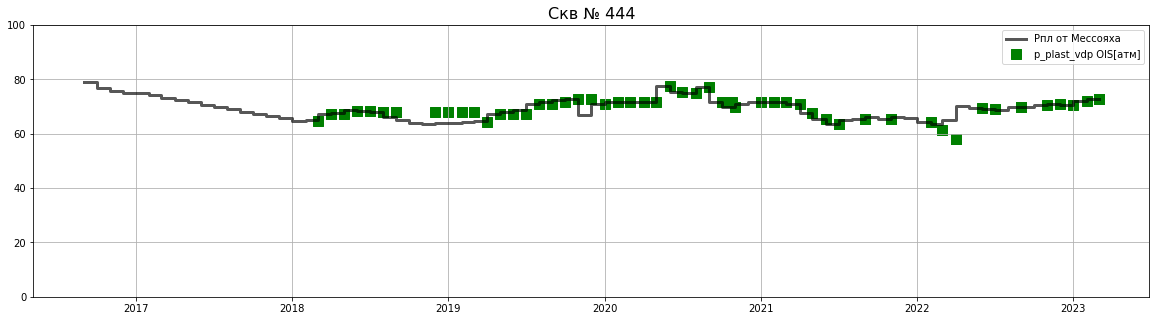

In [60]:
well_sql_xls = '444'
p_plast_xls444 = p_plast_xls[p_plast_xls.well == well_sql_xls]
p_plast_sql444 = p_plast_sql[p_plast_sql.well== well_sql_xls]
f,ax = plt.subplots(figsize=(20,5))
ax.scatter(p_plast_sql444['date'], p_plast_sql444['p_plast_vdp'], color = 'green', alpha=1, s=100, marker = 's', label ='p_plast_vdp OIS[атм]' )
ax.step(p_plast_xls444.date, p_plast_xls444.p_plast, color='black', label ='Pпл от Мессояха', alpha=0.66, lw=3)
ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
ax.set_title('Скв № ' + well_sql_xls, fontsize=16)
ax.set_ylim(0,100)
ax.grid();

## Функция для отрисовки графических диаграмм по всем скважинам Мессояхи в случае ПВР

In [175]:
def display_well_eda_pvr(wellName):
    well_test = ois_init_new[ois_init_new['Скважина'] == wellName]
    
    gtm_pvr_time = gtm_pvr_dates[gtm_pvr_dates['Скв.'] == wellName].iloc[0]['Дата ГТМ']
    gtm_time_converted = gtm_pvr_time.strftime('%d-%m-%Y')

    p_plast = p_plast_xls[p_plast_xls.well == wellName]
    zone = ois_init_new[ois_init_new['Скважина'] == wellName].iloc[0]['Пласт']
    work_type =  gtm_pvr_dates[gtm_pvr_dates['Скв.'] == wellName].iloc[0]['Цель']
    YLIM_QLIQ = round(np.nanmean(well_test['Qж  (ТМ) [м3/сут]']),0)
    
    f,ax = plt.subplots(figsize=(20,5))
    ax.set_title('Скв№ ' + f'{wellName}' + f' {zone}' + f' // дата ГТМ: {gtm_time_converted};' + f' Набор работ: {work_type}', fontsize=20)
#    'Qн (ТМ) [тн/сут]' 'Qж  (ТМ) [м3/сут]' 'Обв-ть V (ХАЛ) [%]' 'Пластовое P кровля [атм]''Pзаб от Pпр' gtm_pvr_time
    ax.scatter(well_test['Дата'], well_test['Qн (ТМ) [тн/сут]'], color = 'brown', alpha=0.5, s=50, label ='Qн (ТМ) [тн/сут]' )
    ax.scatter(well_test['Дата'], well_test['Qж  (ТМ) [м3/сут]'], color = 'blue', alpha=0.5, s=50, label ='Qж (ТМ) [м3/сут]' )
    
    ax.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
    ax.set_ylim(0,YLIM_QLIQ*4)
    ax.set_ylabel('Qж  (ТМ) [м3/сут]', color ='blue')
    ax.vlines(x=gtm_pvr_time, ymin=0, ymax=YLIM_QLIQ*4, colors='blue')
    plt.grid()
    
    ax2 = ax.twinx()
    ax2.scatter(well_test['Дата'], well_test['Обв-ть V (ХАЛ) [%]'], color = 'lightblue', alpha=0.66, s=75, label ='Обв-ть V (ХАЛ) [%]', marker = 's')
    ax2.tick_params(axis='y', labelcolor='lightblue', pad=50, labelsize=14, direction = 'in')
    ax2.set_ylim(0,100)
    ax2.set_ylabel('Обв-ть V (ХАЛ) [%]', color ='lightblue' )
    ax2.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.7, 1))
    
    ax3 = ax.twinx()
    ax3.tick_params(axis='y', labelcolor='green', labelsize=14)
    ax3.scatter(well_test['Дата'], well_test['Пластовое P кровля [атм]'], color = 'green', alpha=0.75, marker = 'd', label ='Pпл кровля OIS [атм]' )
    ax3.scatter(well_test['Дата'], well_test['Pзаб от Pпр'], color = '#17bf74', alpha=0.75, marker = 'd', label ='Pзаб от Pпр OIS' )
    ax3.step(p_plast.date, p_plast.p_plast, color='black', label ='Pпл от Мессояха' )
    ax3.set_ylim(0,100)
    ax3.set_ylabel('Давления пластовы/забойные', color ='green' )
    ax3.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.84, 1))
    plt.tight_layout()
# Надо отключать строку печати диаграммы
#     plt.savefig('eda/' + 'eda_pvr_' + str(wellName) + '.jpg', dpi=300) 

## Просмотр любой скважины для тестирование отображения ПВР

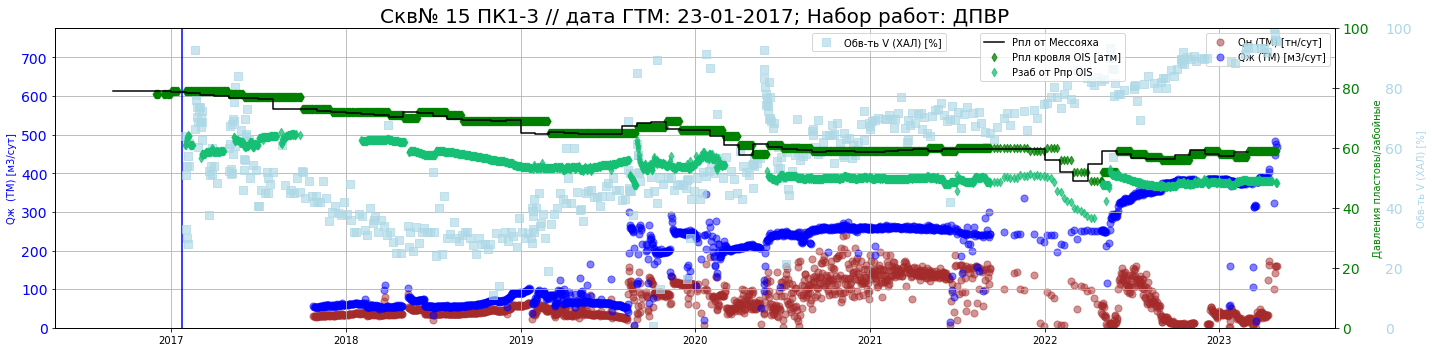

In [176]:
display_well_eda_pvr('15')

## Запускаю циклы применения диаграммных скриптов для скважин в списках на ОПЗ и ПВР 

In [111]:
# for wellName in gtm_dates['Скв.']:
#     try:
#         display_well_eda_opz(wellName)
#     except:
#         print(wellName, 'нет данных')

In [112]:
# for wellName in gtm_pvr_dates['Скв.']:
#     try:
#         display_well_eda_pvr(wellName)
#     except:
#         print(wellName, 'нет данных')

## Подготовка данных для csv-таблиц по целевым скважинам с выдачей 1 мес данных при ВНС, 90 дней до ГТМ и 90 дней после ГТМ

In [23]:
# Тут выясняется что датасеты от Руслана с 2018г и мой датасет от 13 апреля почему то отличаются.
# Впрочем, пока что надо отработать технологию, а потом уже работать с нормальными данным
# ois_init = pd.read_excel('NEFT_MESSO_01.01.2018+.xlsx')
# slq_query_1st['Скважина'] = slq_query_1st['Скважина'].astype('string')
# set1 = np.array(slq_query_1st['Скважина'].unique())
# set2 = ois_init_new['Скважина'].unique()
# set_diff1 = np.setdiff1d(set1, set2)
# set_diff2 = np.setdiff1d(set2, set1)
# temp3 = np.concatenate((set_diff1, set_diff2))
# temp3

In [179]:
# edaWell = '1132'
def excel_well_eda_opz(edaWell):
    edaSelWell = dataframe_ois_init(edaWell)
    edaGtm = gtm_dates[gtm_dates['Скв.'] == edaWell].iloc[0]['Дата ГТМ']
    firstDay = edaSelWell['Дата'].iloc[0]
    delta30 = pd.Timedelta(30, "d")
    twoWeeks = pd.Timedelta(14, "d")
    edaSelWell = edaSelWell[['Месторождение','Дата','Скважина','Куст','Состояние',
                             'Qж  (ТМ) [м3/сут]','Qж ручной [м3/сут]','Qн (ТМ) [тн/сут]', 'Qн расчёт [тн/сут]','Обв-ть V (ХАЛ) [%]','Обв-ть V ручная [%]',
                             'Пластовое P кровля [атм]','Pзаб от Pпр']]
    startMonth = edaSelWell[edaSelWell['Дата'] < firstDay + delta30]
    startMonth['Статус'] = 'месяц ВНС'
#     monthBeforeGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm - delta30-twoWeeks) & (edaSelWell['Дата'] < edaGtm)]
    monthBeforeGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm - delta30*3) & (edaSelWell['Дата'] < edaGtm)]
    monthBeforeGtm['Статус'] = 'перед ОПЗ'
    dayGtm = edaSelWell[edaSelWell['Дата'] == edaGtm]
    dayGtm['Статус'] = 'день ОПЗ'
    monthAfterGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm)&(edaSelWell['Дата'] < edaGtm + delta30*3)]
    monthAfterGtm['Статус'] = 'после ОПЗ'
    edaList = [startMonth, monthBeforeGtm, dayGtm, monthAfterGtm]
    edaSelWellFinal = pd.concat(edaList)
    edaSelWellFinal.to_excel('eda_xls/' + 'xls_opz_' + str(edaWell) + '.xlsx', index=False) 

In [178]:
# for wellName in gtm_dates['Скв.'][:]:
#     try:
#         excel_well_eda_opz(wellName)
#     except:
#         print(wellName, 'нет данных')

In [177]:
def excel_well_eda_pvr(edaWell):
    edaSelWell = dataframe_ois_init(edaWell)
    edaGtm = gtm_pvr_dates[gtm_pvr_dates['Скв.'] == edaWell].iloc[0]['Дата ГТМ']
    firstDay = edaSelWell['Дата'].iloc[0]
    delta30 = pd.Timedelta(30, "d")
    twoWeeks = pd.Timedelta(14, "d")
    edaSelWell = edaSelWell[['Месторождение','Дата','Скважина','Куст','Состояние',
                             'Qж  (ТМ) [м3/сут]','Qж ручной [м3/сут]','Qн (ТМ) [тн/сут]', 'Qн расчёт [тн/сут]','Обв-ть V (ХАЛ) [%]','Обв-ть V ручная [%]',
                             'Пластовое P кровля [атм]','Pзаб от Pпр']]
    startMonth = edaSelWell[edaSelWell['Дата'] < firstDay + delta30]
    startMonth['Статус'] = 'месяц ВНС'
#     monthBeforeGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm - delta30-twoWeeks) & (edaSelWell['Дата'] < edaGtm)]
    monthBeforeGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm - delta30*3) & (edaSelWell['Дата'] < edaGtm)]
    monthBeforeGtm['Статус'] = 'перед ПВР'
    dayGtm = edaSelWell[edaSelWell['Дата'] == edaGtm]
    dayGtm['Статус'] = 'день ПВР'
    monthAfterGtm = edaSelWell[(edaSelWell['Дата'] > edaGtm)&(edaSelWell['Дата'] < edaGtm + delta30*3)]
    monthAfterGtm['Статус'] = 'после ПВР'
    edaList = [startMonth, monthBeforeGtm, dayGtm, monthAfterGtm]
    edaSelWellFinal = pd.concat(edaList)
    edaSelWellFinal.to_excel('eda_xls/' + 'xls_pvr_' + str(edaWell) + '.xlsx', index=False) 

In [98]:
# for wellName in gtm_pvr_dates['Скв.']:
#     try:
#         excel_well_eda_pvr(wellName)
#     except:
#         print(wellName, 'нет данных')

## Пробег по всем скважинам в папке и конкатенация их в один файл

In [126]:
# path_server = r'e:\Jupyter\mess\eda_xls\\'
# dfs = list()
# for file in os.listdir(path_server):
#     fileName = os.path.join(path_server, file)
#     data = pd.read_excel(fileName)
#     dfs.append(data)
#     result = pd.concat(dfs, ignore_index=True)
# result
# result.to_excel('eda_xls/' + 'xls_full_wells_v2.xlsx', index=False) 

## Зачем то ищу скважины в папке e:\Jupyter\mess\ скважины, где были и ПВР и ОПЗ 

In [88]:
import os
dir_path = 'eda/'
res = []
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
opzList = []
pvrList = []
for well in res:
    if 'opz' in well:
        opz_well_name = (well.split('_')[2]).split('.')[0]
        opzList.append(opz_well_name)
    if 'pvr' in well:
        opz_well_name = (well.split('_')[2]).split('.')[0]
        pvrList.append(opz_well_name)
opzDf = pd.DataFrame(opzList, columns=['well_opz'])
opzDf['status'] = 'opz_printed'
pvrDf = pd.DataFrame(pvrList, columns=['well_pvr'])
pvrDf['status'] = 'pvr_printed'

gtm_dates['Скв.'] = gtm_dates['Скв.'].astype('string')
gtm_pvr_dates['Скв.'] = gtm_pvr_dates['Скв.'].astype('string')
opz_well_printed = gtm_dates.set_index('Скв.').join(opzDf.set_index('well_opz'))
pvr_well_printed = gtm_pvr_dates.set_index('Скв.').join(pvrDf.set_index('well_pvr'))

In [89]:
opz_well_printed[~(opz_well_printed.status == 'opz_printed')]

,Пласт,Дата ГТМ,Набор работ,Состав химии,status
181,ПК1-3,2015-08-07,ГМ,нет,NaN
2в,ПК1-3,2021-03-21,ОПЗ нефт.,Соляная к-та 10%,NaN


In [90]:
pvr_well_printed[~(pvr_well_printed.status == 'pvr_printed')]

,Пласт,Дата ГТМ,Цель,status
1503,ПК1-3,2017-05-20,ДПВР,NaN
307,ПК1-3,2018-11-25,ДПВР,NaN
477,ПК1-3,2017-05-09,ДПВР,NaN


In [91]:
opz_pvr = opz_well_printed.join(pvr_well_printed, how='inner', rsuffix='_r')

In [92]:
opz_pvr

,Пласт,Дата ГТМ,Набор работ,Состав химии,status,Пласт_r,Дата ГТМ_r,Цель,status_r
1507,ПК1-3,2017-01-24,ОПЗ + ГМ,Каустическая сода,opz_printed,ПК1-3,2020-07-27,ДПВР,pvr_printed
1595,ПК1-3,2019-07-16,ОПЗ нефт.,Cульфаминовая кислота 10%,opz_printed,ПК1-3,2020-03-14,ДПВР,pvr_printed
165,ПК1-3,2022-08-24,ОПЗ нефт.,КАЭ (НСl 12%),opz_printed,ПК1-3,2019-05-27,ДПВР,pvr_printed
1690,ПК1-3,2022-07-14,ОПЗ нефт.,КАЭ (НСl 12%),opz_printed,ПК1-3,2022-06-30,ДПВР,pvr_printed
205,ПК1-3,2022-09-29,ОПЗ нефт.,Соляная к-та 15% + Магний (ТКО),opz_printed,ПК1-3,2022-09-29,ДПВР,pvr_printed
298,ПК1-3,2017-11-12,ГМ,ПАВ,opz_printed,ПК1-3,2019-08-13,ДПВР,pvr_printed
3048,ПК1-3,2022-04-30,ОПЗ нефт.,СКО 15% + Нефрас,opz_printed,ПК1-3,2019-11-15,ДПВР,pvr_printed
3048,ПК1-3,2022-04-30,ОПЗ нефт.,СКО 15% + Нефрас,opz_printed,ПК1-3,2022-04-30,ДПВР,pvr_printed
431,ПК1-3,2022-05-31,ОПЗ нефт.,СКО 12% + Нефрас,opz_printed,ПК1-3,2022-05-31,ДПВР,pvr_printed
500,ПК1-3,2021-04-09,ОПЗ нефт.,Соляная к-та 6%,opz_printed,ПК1-3,2019-12-22,ДПВР,pvr_printed
